# Simple Linear Regression

#### https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression/notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Housing.csv")

df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
x1 = np.array(df["area"]) / 10 
y = np.array(df["price"]) / 1000

m = len(x1)

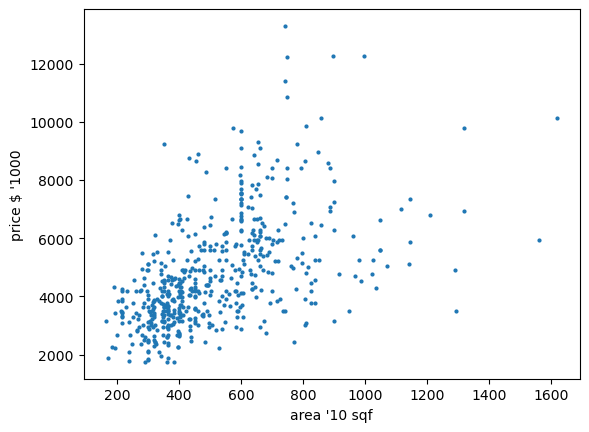

In [4]:
plt.plot(x1,y , 'o' , ms = 2)


plt.xlabel("area '10 sqf")
plt.ylabel("price $ '1000")
plt.show()

In [5]:
mx1,Mx1 = min(x1) ,max(x1)
my,My = min(y) ,max(y)

print(mx1,Mx1, my,My)

165.0 1620.0 1750.0 13300.0


### Cost function

In [6]:

def cost_func(m,x,y,w,b):
    f = w * x + b

    J = (1/2*m) * np.sum((f - y)**2)
    
    return J   
    
cost_func(m,x1,y,10,1200) 

944255513001.9186

### Gradient Descent

In [7]:

def gradient_descent(m,x,y,w=1,b=1,lr = 0.0000001 , max_iter = 1000 ):
    
    cost = []
    
    '''
    converged = False
    epsilon = 0.01
    '''
    
    #while not converged:
    
    for _ in range(max_iter): 
        
        f = w * x + b
        J = (1/2*m) * np.sum((f - y)**2)
        cost.append(J)
        
        
        '''
        #checking for convergence
        if len(cost)>1:

            change_in_cost = abs((cost[-2]-cost[-1])/cost[-2])  

            if change_in_cost < epsilon:
                converged = True 
        '''
        

        der_w = (1/m) * np.sum((f-y)*x)
        der_b = (1/m) * np.sum(f-y)
        
        w = w - lr * der_w
        b = b - lr * der_b
        
        
       
    
    return w,b,cost
    

In [8]:
final_w, final_b, final_cost = gradient_descent(m, x1, y, 9,1 , max_iter = 10000)

print("Final weights:", final_w)
print("Final bias:", final_b)
#print("Final cost:", final_cost)


Final weights: 8.554860928091992
Final bias: 1.3584482116161438


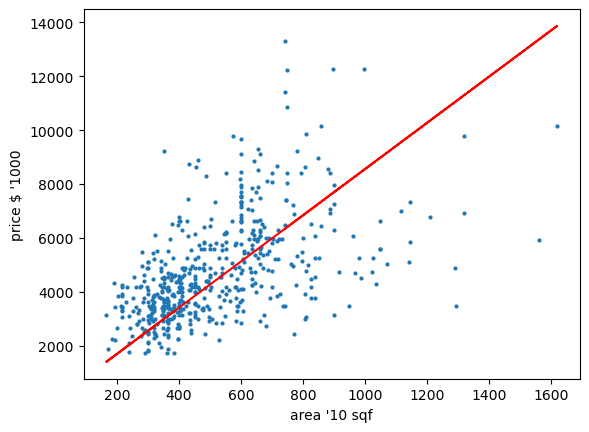

In [9]:
plt.plot(x1,y , 'o' , ms = 2)

fx = final_w*x1+final_b
plt.plot(x1,fx , color = "red")

plt.xlabel("area '10 sqf")
plt.ylabel("price $ '1000")
plt.show()

#

In [10]:
df = pd.read_csv("Salary.csv")

x1 = np.array(df["YearsExperience"])
y = np.array(df["Salary"])/1000
m = len(x1)




In [11]:
final_w, final_b, final_cost = gradient_descent(m, x1, y ,9.449962321454944,24.848203966524082,lr = 0.01, max_iter = 100000)

print("Final weights:", final_w)
print("Final bias:", final_b)
print(final_cost[-1])


'''
15747.505939017334
15730.69868405172
15728.391326424902
15703.154398073126
15677.138517636437
15609
15091
14088
14071.928275026436  -  minimum of J(w,b)
'''

Final weights: 9.449962321454944
Final bias: 24.848203966524082
14071.928275026436


'\n15747.505939017334\n15730.69868405172\n15728.391326424902\n15703.154398073126\n15677.138517636437\n15609\n15091\n14088\n14071.928275026436  -  minimum of J(w,b)\n'

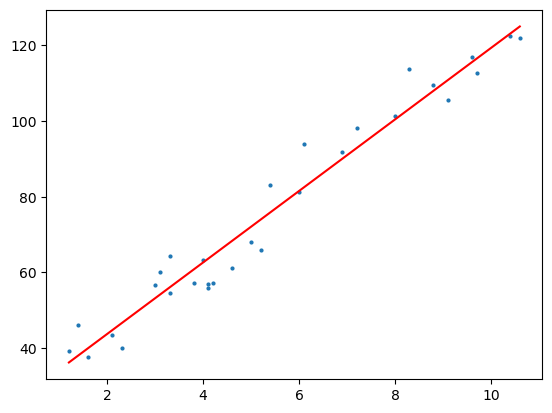

In [12]:
plt.plot(x1,y , 'o' , ms = 2)

fx = final_w*x1+final_b
plt.plot(x1,fx , color = "red")

plt.show()

#